<a href="https://colab.research.google.com/github/hasdasda/HoctheoPhamDinhKhanh/blob/main/B%E1%BA%A3n_sao_c%E1%BB%A7a_Dap_an_and_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/My\ Drive
%cd VNPT
%cd VNPT_01

Mounted at /content/drive
/content/drive/My Drive
/content/drive/.shortcut-targets-by-id/1UnC-iLs86hXm-MhLt4GMg_ua_MKNBL4I/VNPT
/content/drive/.shortcut-targets-by-id/1UnC-iLs86hXm-MhLt4GMg_ua_MKNBL4I/VNPT/VNPT_01


In [ ]:
!ls

Dap_an_and_pca.ipynb  De_bai.ipynb  IoTID20.csv  Model.ipynb  UNSW_2018_IoT_Botnet_Dataset_1.csv


In [ ]:
#Bước 1: Import thư viện
import pandas as pd   #xử lý dữ liệu
import numpy as np    #xử lý ma trận
from math import floor
from sklearn.preprocessing import LabelEncoder

In [ ]:
#Bước 2: Đọc file đầu vào
#Nếu file input là file excel thì thay read_csv bằng read_excel
#header chỉ dòng chứa tên các features, index_col chỉ cột chứa số thứ tự các mẫu đầu vào
#Nếu có header/index đặtt giá trị biến = 0, nếu không đặt = None
data = pd.read_csv('IoTID20.csv', header=0, index_col=None)

In [ ]:
data

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
0,192.168.0.13-192.168.0.16-10000-10101-17,192.168.0.13,10000,192.168.0.16,10101,17,25/07/2019 03:25:53 AM,75,1,1,...,0.0,0.0,0.0,75.0,0.000000,75.0,75.0,Anomaly,Mirai,Mirai-Ackflooding
1,192.168.0.13-222.160.179.132-554-2179-6,222.160.179.132,2179,192.168.0.13,554,6,26/05/2019 10:11:06 PM,5310,1,2,...,0.0,0.0,0.0,2655.0,2261.327486,4254.0,1056.0,Anomaly,DoS,DoS-Synflooding
2,192.168.0.13-192.168.0.16-9020-52727-6,192.168.0.16,52727,192.168.0.13,9020,6,11/07/2019 01:24:48 AM,141,0,3,...,0.0,0.0,0.0,70.5,0.707107,71.0,70.0,Anomaly,Scan,Scan Port OS
3,192.168.0.13-192.168.0.16-9020-52964-6,192.168.0.16,52964,192.168.0.13,9020,6,04/09/2019 03:58:17 AM,151,0,2,...,0.0,0.0,0.0,151.0,0.000000,151.0,151.0,Anomaly,Mirai,Mirai-Hostbruteforceg
4,192.168.0.1-239.255.255.250-36763-1900-17,192.168.0.1,36763,239.255.255.250,1900,17,10/09/2019 01:41:18 AM,153,2,1,...,0.0,0.0,0.0,76.5,0.707107,77.0,76.0,Anomaly,Mirai,Mirai-Hostbruteforceg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625778,192.168.0.24-210.89.164.90-56112-8043-17,192.168.0.24,56112,210.89.164.90,8043,17,25/07/2019 03:25:00 AM,277,1,1,...,0.0,0.0,0.0,277.0,0.000000,277.0,277.0,Anomaly,Mirai,Mirai-UDP Flooding
625779,192.168.0.13-222.131.171.244-554-4570-6,222.131.171.244,4570,192.168.0.13,554,6,26/05/2019 10:06:51 PM,1658,0,2,...,0.0,0.0,0.0,1658.0,0.000000,1658.0,1658.0,Anomaly,DoS,DoS-Synflooding
625780,192.168.0.13-192.168.0.16-9020-52739-6,192.168.0.16,52739,192.168.0.13,9020,6,11/07/2019 01:29:09 AM,77,1,1,...,0.0,0.0,0.0,77.0,0.000000,77.0,77.0,Anomaly,Scan,Scan Port OS
625781,192.168.0.13-192.168.0.16-9020-49784-6,192.168.0.13,9020,192.168.0.16,49784,6,20/05/2019 05:00:29 AM,240,2,1,...,0.0,0.0,0.0,120.0,7.071068,125.0,115.0,Normal,Normal,Normal


In [ ]:
# Thay thế các giá trị infinity bằng các giá trị nan
data.replace([np.inf, -np.inf], np.nan, inplace=True)
# Loại bỏ các giá trị nan
data = data.dropna()

In [ ]:
data

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
0,192.168.0.13-192.168.0.16-10000-10101-17,192.168.0.13,10000,192.168.0.16,10101,17,25/07/2019 03:25:53 AM,75,1,1,...,0.0,0.0,0.0,75.0,0.000000,75.0,75.0,Anomaly,Mirai,Mirai-Ackflooding
1,192.168.0.13-222.160.179.132-554-2179-6,222.160.179.132,2179,192.168.0.13,554,6,26/05/2019 10:11:06 PM,5310,1,2,...,0.0,0.0,0.0,2655.0,2261.327486,4254.0,1056.0,Anomaly,DoS,DoS-Synflooding
2,192.168.0.13-192.168.0.16-9020-52727-6,192.168.0.16,52727,192.168.0.13,9020,6,11/07/2019 01:24:48 AM,141,0,3,...,0.0,0.0,0.0,70.5,0.707107,71.0,70.0,Anomaly,Scan,Scan Port OS
3,192.168.0.13-192.168.0.16-9020-52964-6,192.168.0.16,52964,192.168.0.13,9020,6,04/09/2019 03:58:17 AM,151,0,2,...,0.0,0.0,0.0,151.0,0.000000,151.0,151.0,Anomaly,Mirai,Mirai-Hostbruteforceg
4,192.168.0.1-239.255.255.250-36763-1900-17,192.168.0.1,36763,239.255.255.250,1900,17,10/09/2019 01:41:18 AM,153,2,1,...,0.0,0.0,0.0,76.5,0.707107,77.0,76.0,Anomaly,Mirai,Mirai-Hostbruteforceg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625778,192.168.0.24-210.89.164.90-56112-8043-17,192.168.0.24,56112,210.89.164.90,8043,17,25/07/2019 03:25:00 AM,277,1,1,...,0.0,0.0,0.0,277.0,0.000000,277.0,277.0,Anomaly,Mirai,Mirai-UDP Flooding
625779,192.168.0.13-222.131.171.244-554-4570-6,222.131.171.244,4570,192.168.0.13,554,6,26/05/2019 10:06:51 PM,1658,0,2,...,0.0,0.0,0.0,1658.0,0.000000,1658.0,1658.0,Anomaly,DoS,DoS-Synflooding
625780,192.168.0.13-192.168.0.16-9020-52739-6,192.168.0.16,52739,192.168.0.13,9020,6,11/07/2019 01:29:09 AM,77,1,1,...,0.0,0.0,0.0,77.0,0.000000,77.0,77.0,Anomaly,Scan,Scan Port OS
625781,192.168.0.13-192.168.0.16-9020-49784-6,192.168.0.13,9020,192.168.0.16,49784,6,20/05/2019 05:00:29 AM,240,2,1,...,0.0,0.0,0.0,120.0,7.071068,125.0,115.0,Normal,Normal,Normal


In [ ]:
#Khởi tạo biến thư viện
encoder = LabelEncoder()
#Cho thuật toán đọc các nhãn các loại tấn công
encoder.fit(data.iloc[:,-1])
encoder.classes_
#Nếu tại đây ta sử dụng câu lệnh transform thì nhãn DoS sẽ có label 0, MITM label1,
#Mirai-Ackflooding label 2, ... Normal label 6
#Để Normal có nhãn 0 ta sắp xếp lại thứ tự các class
#Normal label 0, DoS label 1, Mirai label 2-5, MITM label 6, Scan label 7-8
encoder.classes_ = np.array(['Normal', 'DoS-Synflooding', 'Mirai-Ackflooding',
        'Mirai-HTTP Flooding', 'Mirai-Hostbruteforceg', 'Mirai-UDP Flooding',
        'MITM ARP Spoofing', 'Scan Hostport', 'Scan Port OS'])
#Label chuyển từ dạng chữ sang dạng số
y = encoder.transform(data.iloc[:,-1])

In [ ]:
y

array([2, 1, 8, ..., 8, 0, 5])

In [ ]:
#Loại bỏ ip, timestamp, ID ra khỏi data X
X = pd.concat([data.iloc[:,2], data.iloc[:,4:6], data.iloc[:,7:-3]], axis = 1)

In [ ]:
#Bước 3: Cắt lấy file train và file test
#Trong VD này, ta lấy 1/3 số mẫu của tất cả các label
#Khi cắt cần đảm bảo số mẫu của từng label không quá chênh lệch, quá nhỏ
#Cắt data ra làm 2 phần, train chiếm 70%, test chiếm 30% => Train_size = 1/3*0.7=7/30, test_size = 1/3*0.3=0.1
from sklearn.model_selection import train_test_split
#X_train và X_test là các features, y_train và y_test lần lượt là nhãn bộ train và test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=7/30, test_size=0.1,shuffle=True)


In [ ]:
#Bước 4: Chuẩn hóa dữ liệu
#X = (x-xmin)/(xmax-xmin)

#Khi chuẩn hoá, thì scaler chỉ được fit X_train

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
#Với bộ dữ liệu VD, 2 cột đầu tiên của data là port number, có giá trị từ 0-65535.
scaler.data_max_[0:2] = np.array([65535, 65535])
scaler.data_min_[0:2] = np.array([0, 0])

#Chuẩn hóa dữ liệu
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

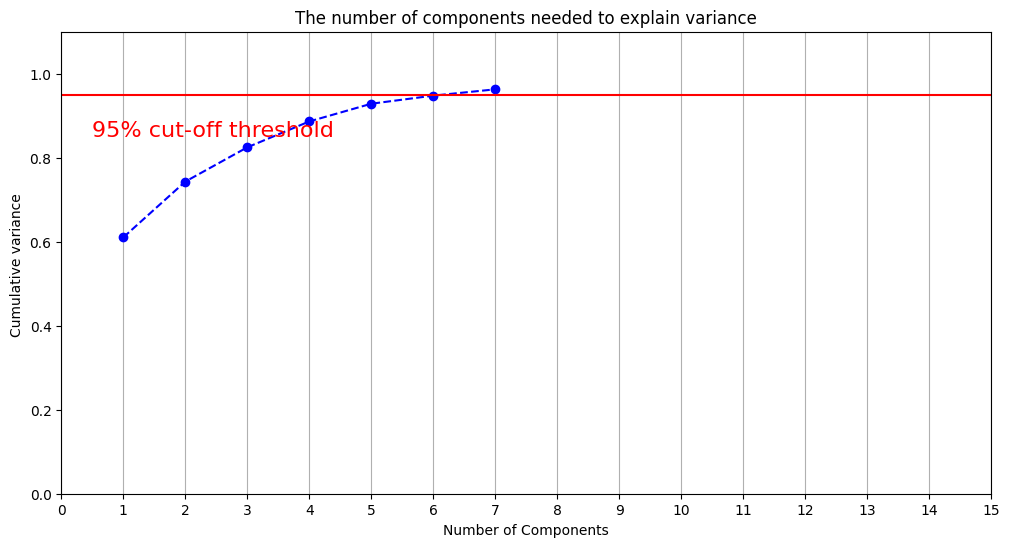

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95)
pca.fit(X_train_norm)
X_train_norm_reduce = pca.transform(X_train_norm)
pca.components_



#Vẽ hình
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 8, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 16, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance ')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

